# Exploratroy Data Analysis of Adult Income

## 1. Introduction


#### 1.1 Data description

An individual's annual income is influenced by various factors such as education level, age, gender, occupation, and other relevant factors, which are captured in the data. This data can be used to analyze the relationship between these attributes and an individual's income level.


---


>**Data on Categorical Attributes:**
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. <br><br>

>**Data on Continuous Attributes:**
- `age`: continuous. Age of an individual.
- `fnlwgt`: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous. Individual's working hour per week. 

<br>

- Here is the official link to dataset [Kaggle](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)<br>
- Can also be found in my [Github Repository](https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Classification/adult.csv)


###2. Objective

Our objective is to perform **Exploratory Data Analysis (EDA)** on the provided data to gain insights and identify patterns that can help improve the classification of an individual's annual income. We will explore the relationships between various attributes, visualize the distributions of continuous variables, and investigate any missing or inconsistent values. 

By conducting EDA, we aim to improve the accuracy and robustness of our classification models.


### 3. Data Visualization

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [96]:

# Set style and font size
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

%matplotlib inline


In [18]:
# Dataset Url
url = "https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Classification/adult.csv"

In [19]:
# Load the dataset
df = pd.read_csv(url)


In [20]:
# Number of rows and columns 
df.shape

(48842, 15)

 The dataframe has 48842 rows (observations) and 15 columns (variables)

In [6]:
# First few rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The missing values in some of the columns, such as **workclass** and **occupation**, are denoted with a question mark **(?)**. These missing values need to be handled.

In [21]:
#Information about the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [22]:
# Check for null values
print("Null values in the dataframe:\n", df.isnull().sum())

Null values in the dataframe:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [10]:
# Check data types of each column
print("\nData types in the dataframe:\n", df.dtypes)


Data types in the dataframe:
 age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


The data types of different columns are seem to be justified based on their description.

### 3. Data Cleaning

In [24]:
# Replace '?' with the mode in workclass, occupation, and native-country columns
df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
df['occupation'].replace('?', df['occupation'].mode()[0], inplace=True)
df['native-country'].replace('?', df['native-country'].mode()[0], inplace=True)


In [26]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [27]:
# Convert income column to 0/1
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)


In [28]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [11]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.shape[0] == 0:
    print("There are no duplicate rows in the dataframe.")
else:
    print("There are", duplicate_rows.shape[0], "duplicate rows in the dataframe.")

There are 52 duplicate rows in the dataframe.


In [31]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [32]:
# Get unique value counts for each column
df.nunique(axis=0)

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [30]:
# Format the output of the describe method
summary = df.describe().T.style \
    .format("{:.2f}", subset=pd.IndexSlice[:, ['mean', 'std']]) \
    .bar(subset=['mean'], color='#ff6961') \
    .background_gradient(subset=['std'], cmap='PuBu', low=0, high=0.2) \
    .background_gradient(subset=['50%'], cmap='PuBu', low=0, high=0.2) \
    .set_caption("Summary Statistics of Housing Dataset") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'black'),
            ('font-size', '18px'),
            ('font-weight', 'bold')
        ]
    }, {
        'selector': 'th, td',
        'props': [
            ('font-size', '16px')
        ]
    }, {
        'selector': 'th',
        'props': [
            ('text-align', 'center'),
            ('background-color', '#f2f2f2')
        ]
    }])

# Display the formatted output
summary

,count,mean,std,min,25%,50%,75%,max
age,48842.000000,38.64,13.71,17.000000,28.000000,37.000000,48.000000,90.000000
fnlwgt,48842.000000,189664.13,105604.03,12285.000000,117550.500000,178144.500000,237642.000000,1490400.000000
educational-num,48842.000000,10.08,2.57,1.000000,9.000000,10.000000,12.000000,16.000000
capital-gain,48842.000000,1079.07,7452.02,0.000000,0.000000,0.000000,0.000000,99999.000000
capital-loss,48842.000000,87.50,403.00,0.000000,0.000000,0.000000,0.000000,4356.000000
hours-per-week,48842.000000,40.42,12.39,1.000000,40.000000,40.000000,45.000000,99.000000
income,48842.000000,0.24,0.43,0.000000,0.000000,0.000000,0.000000,1.000000


Based on the summary statistics, some key findings that could help with data visualization are:

- The **majority** of individuals in the dataset (**76%**) have an income of \$50,000 or less per year.
- The **age** of individuals in the dataset ranges from **17** to **90** years old, with a mean of **38.64** years.
- The **educational level** of individuals in the dataset ranges from **1** to **16** years, with a mean of **10.08** years.
- The **working hours per week** of individuals in the dataset range from **1** to **99** hours, with a mean of **40.42** hours.
- The mean income of individuals in the dataset is **0.24**, indicating that only **24%** of the individuals have an income greater than $50,000 per year.



In [39]:
# Select the categorical columns
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Describe the categorical data
cat_desc = df[cat_cols].describe()
cat_desc

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48789,48789,48789,48789,48789,48789,48789,48789
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36654,15770,22366,8969,19703,41713,32614,44647


Here are some inferences:

- Marital status: The most common marital status of individuals is married with a civilian spouse (Married-civ-spouse).
- Occupation: The most common occupation is in the professional specialty category (Prof-specialty).
- Relationship: The most common relationship of individuals is with a husband.
- Race: The majority of individuals are White (85%).
- Gender: The majority of individuals  are Male (67%).
- Native country: The majority of individuals are from the United States (91%).


###4. Exploratory Data Analysis

<img src="https://github.com/nagensk9/INDE577_ML/blob/main/Images/EDA.png?raw=true" >

Exploratory Data Analysis (EDA) is the process of examining and understanding the data to **discover patterns, relationships, and anomalies**. Following are our main objectives of performing EDA.

* Underlying **structure of the data**, the types of variables, and their distributions.

* **Detecting outliers and extreme values**, which can be errors or unusual data points that require special attention.

* **Identify Relationships between variables**, such as correlations or causal relationships.

* **Selecting relevant features** for a predictive model, by identifying the most important variables that are highly correlated with the outcome variable.

* **identifying missing data**, outliers, and other issues that need to be addressed before building a predictive model.

[Reference](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process.png)
    

In [46]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols[:-1]

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

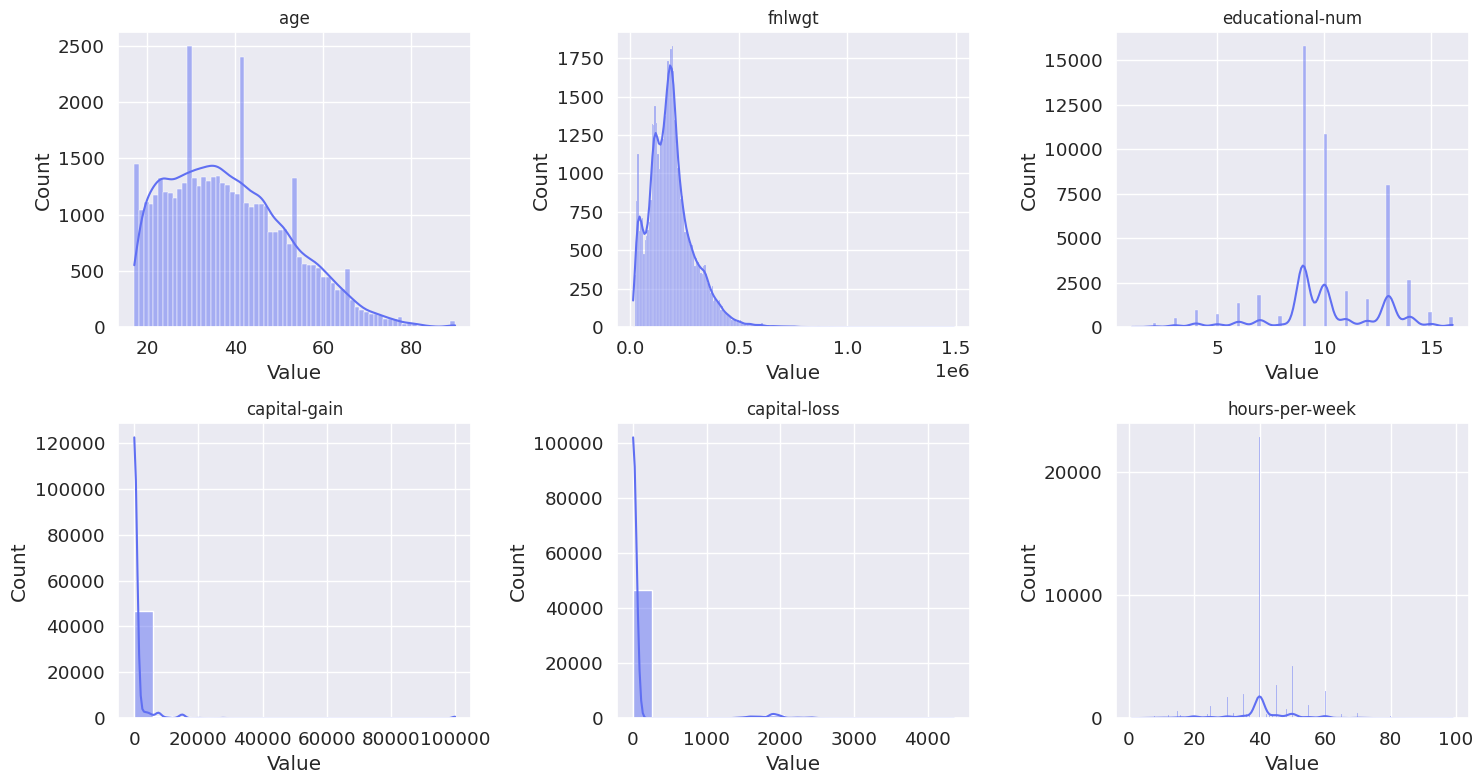

In [48]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Set up the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot histograms for each numeric variable
for i, col in enumerate(numeric_cols[:-1]):
    ax = axes[i//3, i%3] # select the correct subplot
    sns.histplot(df[col], ax=ax, kde=True, color='#606ff2')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Set xticks
if col == 0:
    xticks = ax.get_xticks()
    ax.set_xticks(xticks[::2])

# Set yticks
yticks = ax.get_yticks()
ax.set_yticks(yticks[::2])

# Delete the last empty axes
# fig.delaxes(axes[2,1])
# fig.delaxes(axes[2,2])

plt.tight_layout()
plt.show()

This data visaulaization is helping us to determine the normal, uniform, exponential or skewed distribution of data for different features.
 
- **Age** is right skwed

In [50]:
df[df["age"]>70].shape

(867, 15)

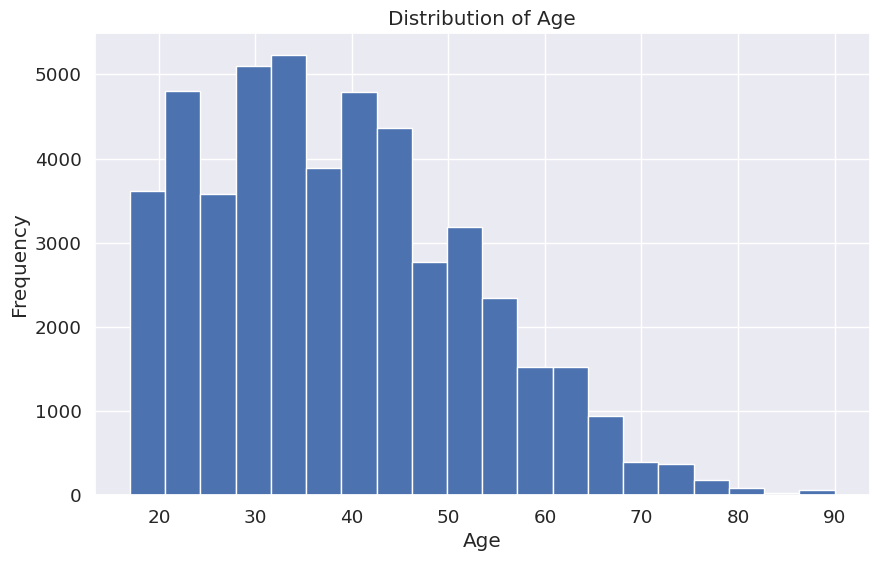

In [56]:
# Plot a histogram of age
df['age'].plot.hist(bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()



- The age range with the highest frequency is between 30 and 40 years old

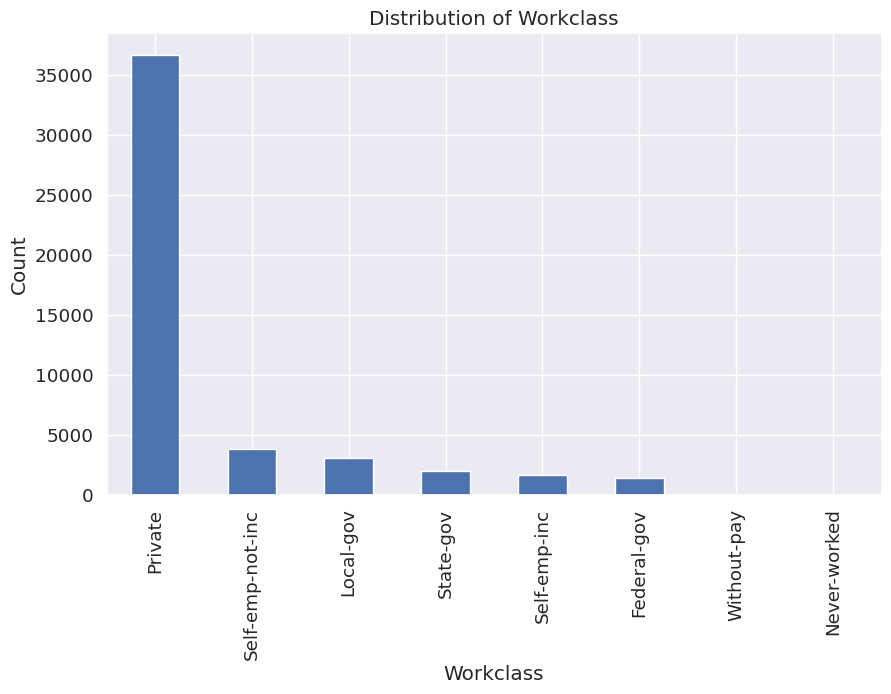

In [58]:
# Plot a histogram of workclass
df['workclass'].value_counts().plot(kind='bar')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.show()


- The majority of individuals belong to the private workclass, with a count of 36,705 which accounts for 75.15% of the dataset.

#### Education

In [74]:
edu_categories = df['education'].unique()
edu_categories

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

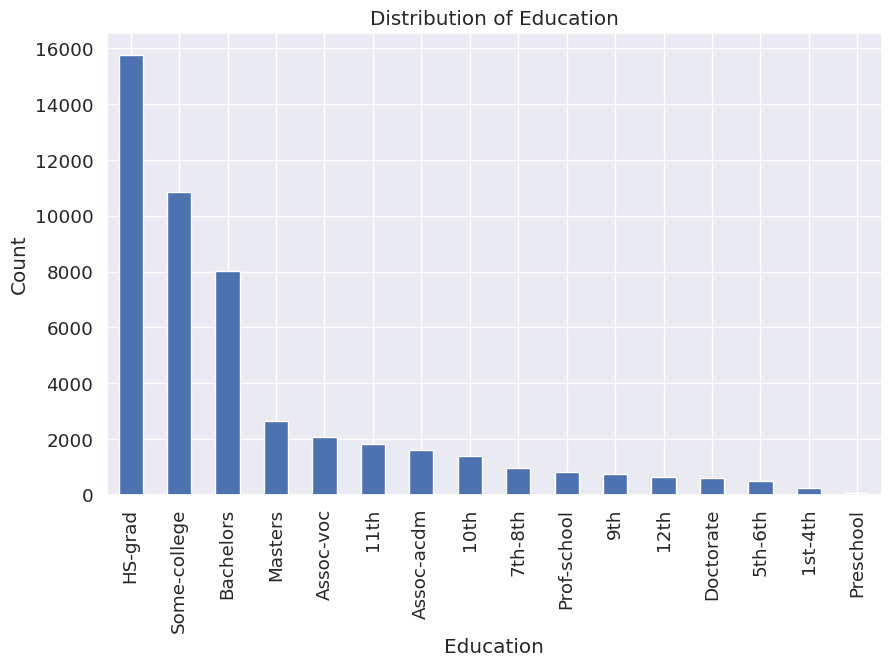

In [57]:
# Plot a histogram of education
df['education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

- Most common level of education is a high school diploma (HS-grad), with a count of 15,770 which accounts for 32.3% of the dataset. 
- The next most common levels of education are some college (10,718 individuals or 22%) and bachelor's degree (7,898 individuals or 16.2%).
- The least common levels of education are preschool (31 individuals or 0.06%) and doctorate (1,666 individuals or 3.4%)

In [122]:
# Map education categories to broader categories
edu_mapping = {
    '1st-4th': 'HS',
    '5th-6th': 'HS',
    '7th-8th': 'HS',
    '9th': 'HS',
    '10th': 'HS',
    '11th': 'HS',
    '12th': 'HS',
    'HS-grad': 'Grad',
    'Assoc-acdm': 'college',
    'Assoc-voc': 'college',
    'Some-college': 'college',
    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Prof-school': 'Masters',
    'Doctorate': 'Doctorate',
}

df['education-level'] = df['education'].map(edu_mapping)

In [82]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,HS,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,Grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,college,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


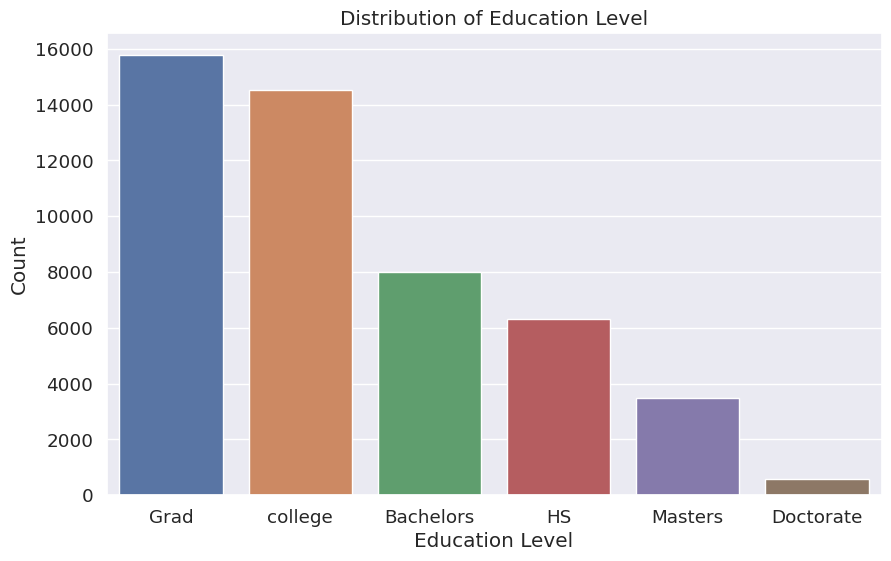

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

### Marital Status

In [87]:
rel_categories = df['marital-status'].unique()
rel_categories

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

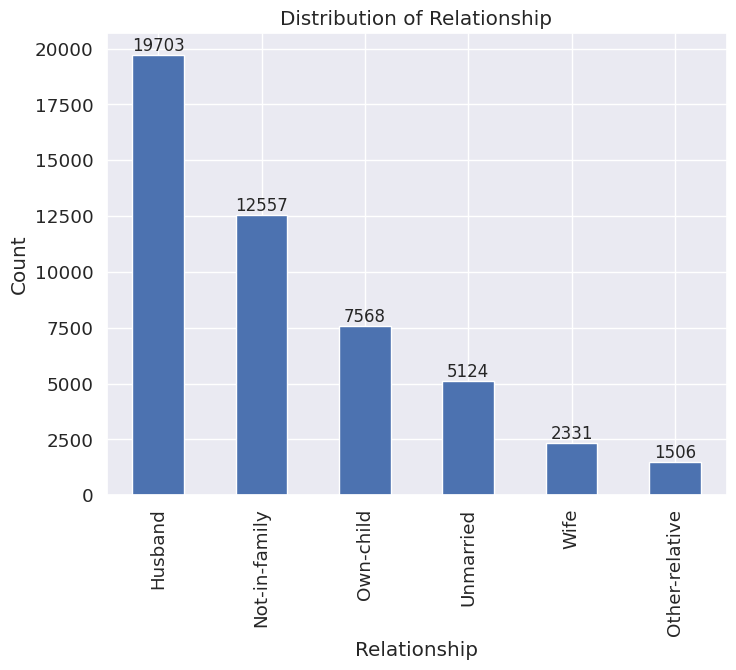

In [59]:
# Create a bar chart of relationship with count annotation
plt.figure(figsize=(8,6))
ax = df['relationship'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Distribution of Relationship')
plt.show()


- **husband** occupies 40% among all categories

In [121]:
# Map marital status categories to broader categories
marital_mapping = {
    'Never-married': 'Never_married',
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Widowed': 'Widowed',
    'Divorced': 'Separated',
    'Separated': 'Separated',
}

df['marital-status'] = df['marital-status'].map(marital_mapping)

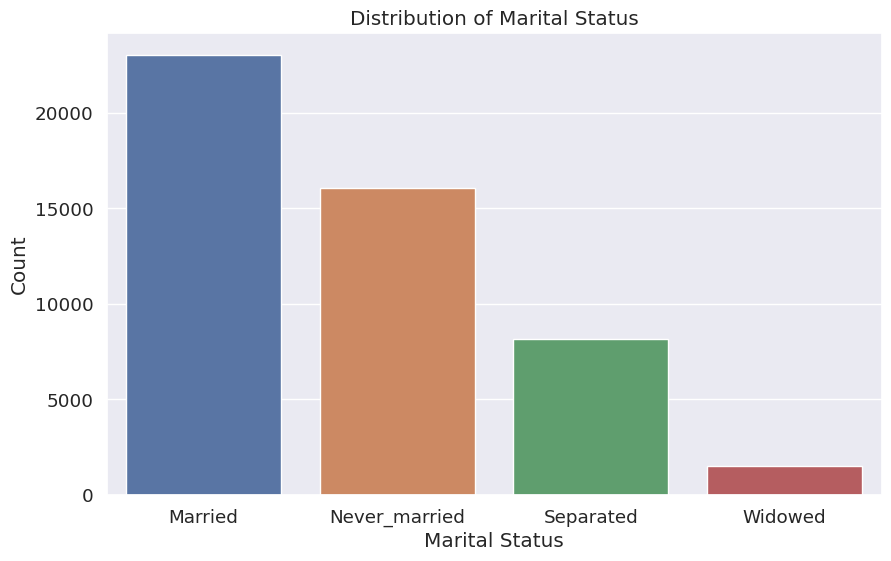

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital_status', data=df, order=df['marital_status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

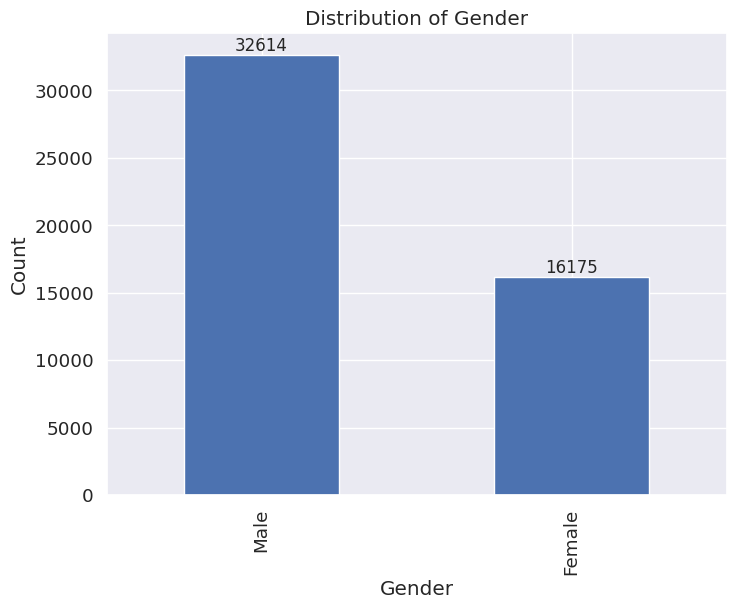

In [90]:
# Create a bar chart of gender
plt.figure(figsize=(8,6))
ax = df['gender'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

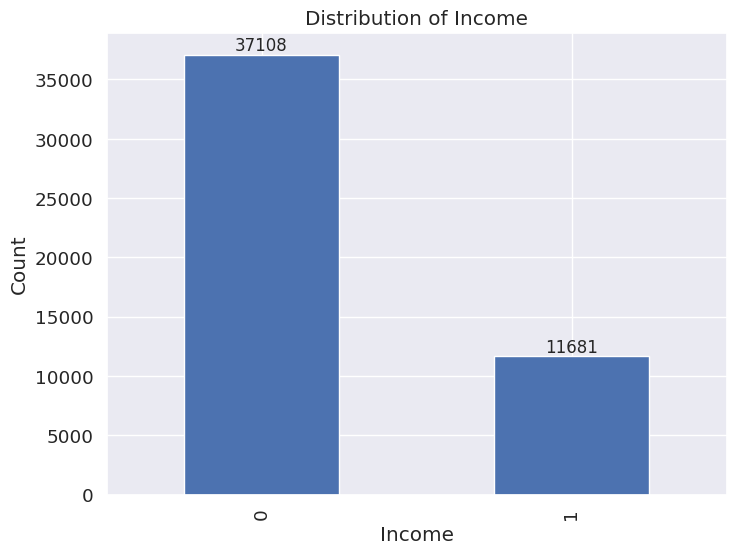

In [62]:
# Create a bar chart of income
plt.figure(figsize=(8,6))
ax = df['income'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

- 76% individual earns less than \$50k:

<Figure size 500x500 with 0 Axes>

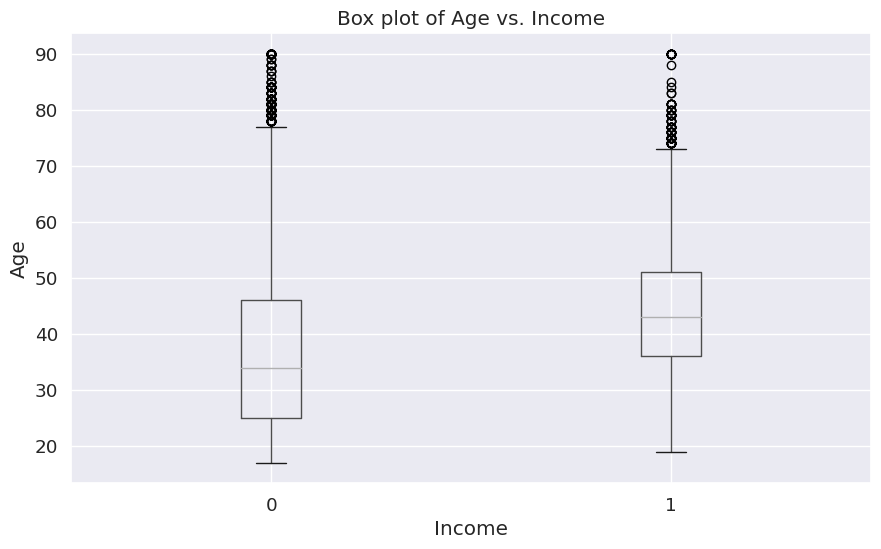

In [93]:

# Create a box plot of age vs. income
plt.figure(figsize=(5,5))
ax = df.boxplot(column=['age'], by='income')
ax.set_xlabel('Income')
ax.set_ylabel('Age')
plt.title('Box plot of Age vs. Income')
plt.suptitle('')
plt.show()

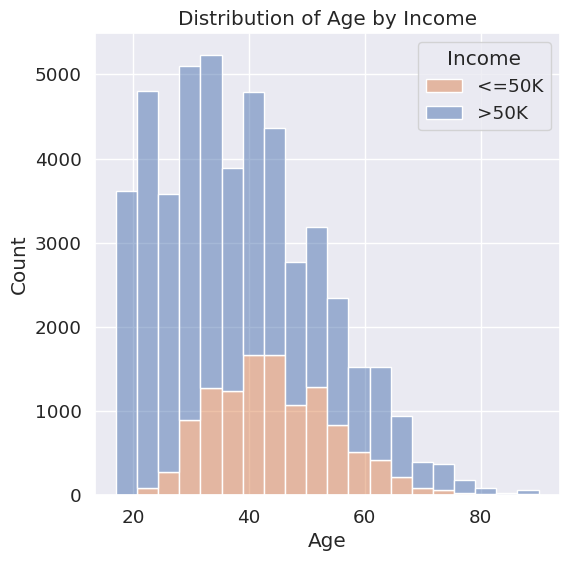

In [99]:
# Plot a distplot for age, grouped by income
# Define the income groups
income_groups = ['<=50K', '>50K']

# Define the colors for each income group
income_colors = ['#4c72b0', '#c44e52']

sns.histplot(data=df, x='age', hue='income', multiple='stack', alpha=0.5, bins=20)
plt.title('Distribution of Age by Income')
plt.xlabel('Age')
plt.legend(title='Income', labels=income_groups)
plt.show()

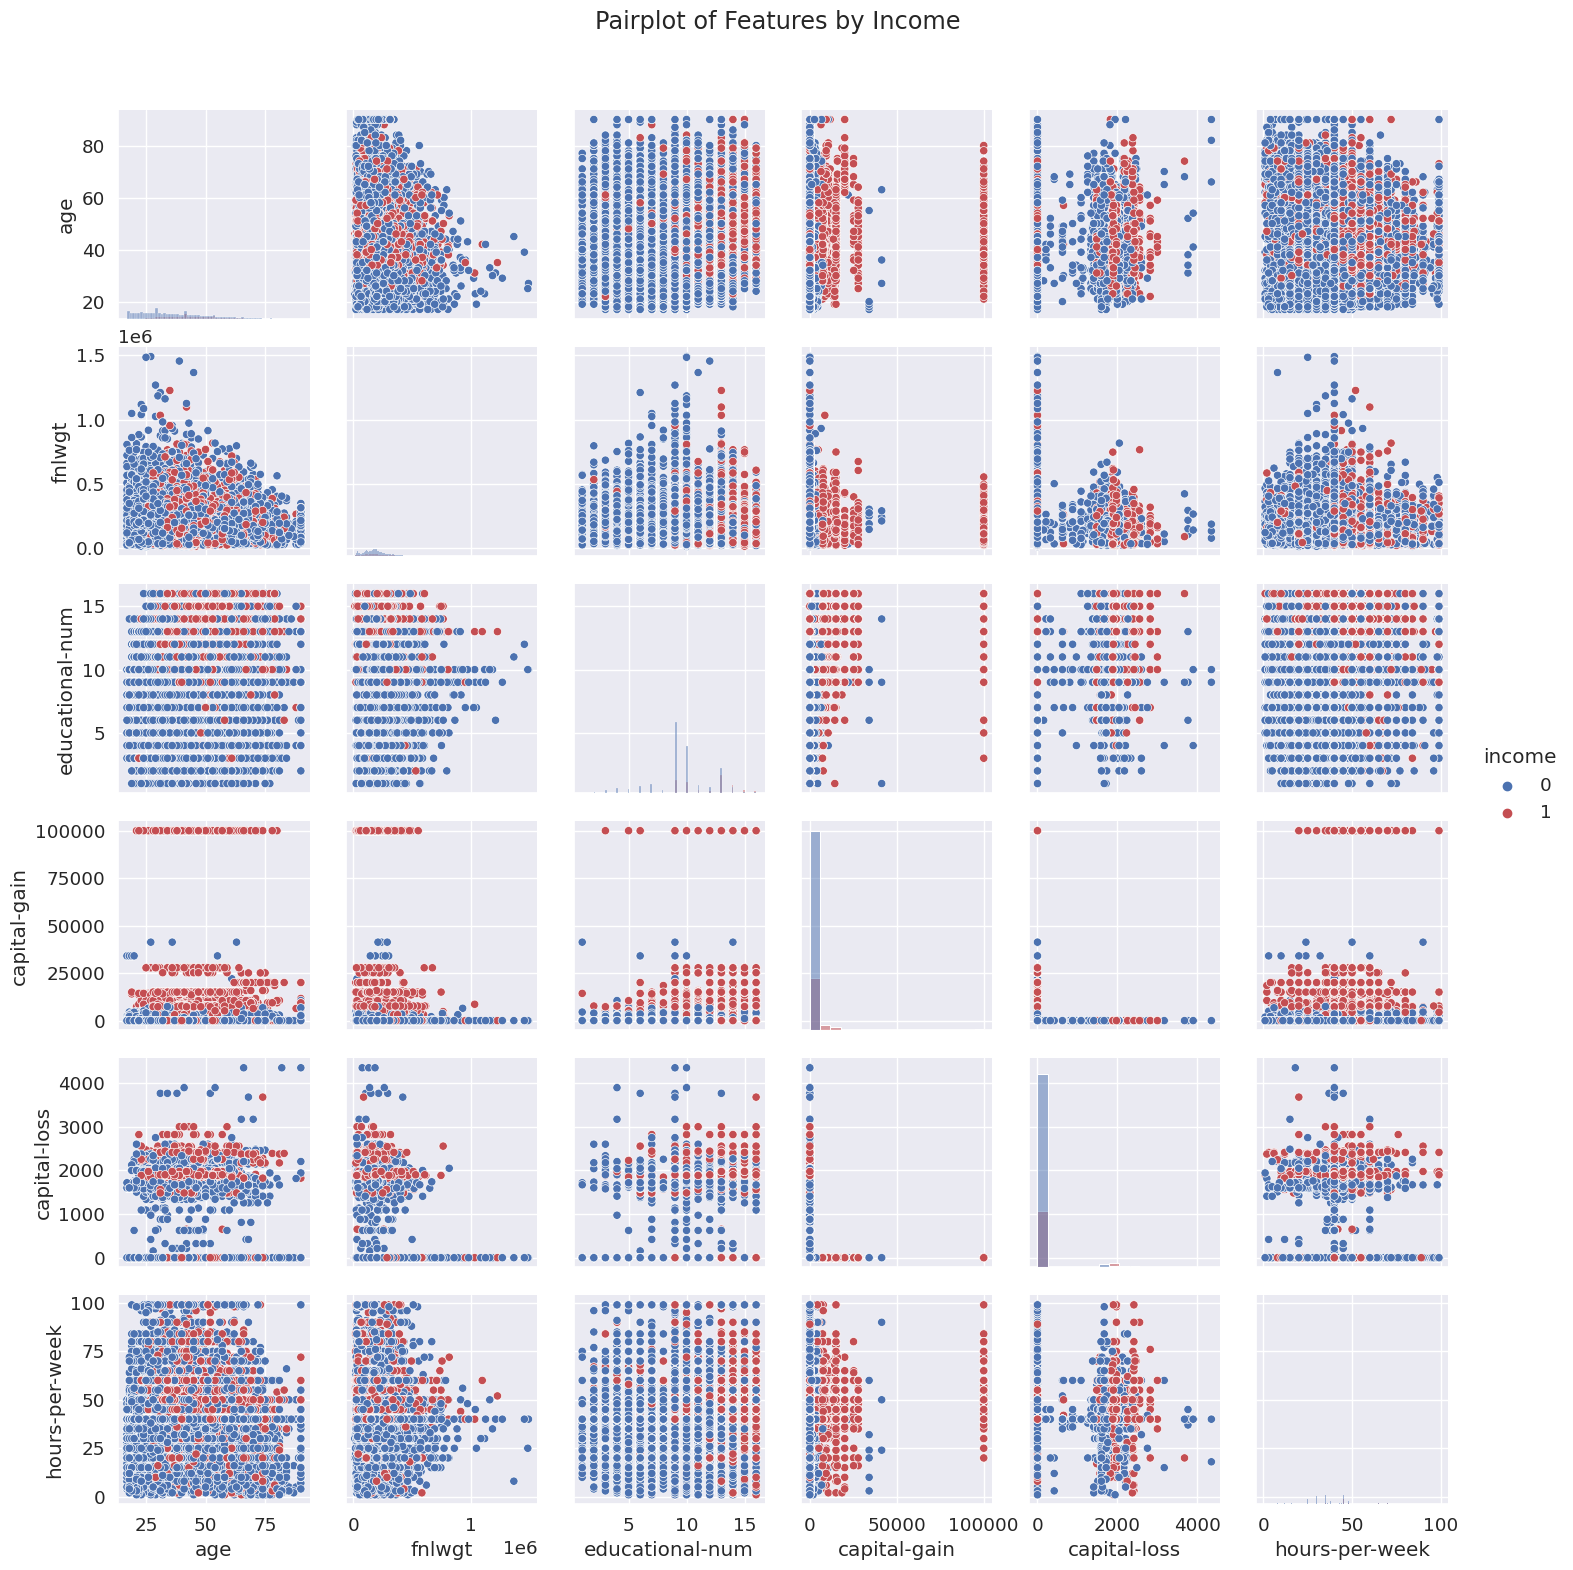

In [100]:
# Define the income groups
income_groups = ['<=50K', '>50K']

# Define the colors for each income group
income_colors = ['#4c72b0', '#c44e52']

# Create a pairplot of every feature with income
sns.pairplot(data=df, hue='income', palette=income_colors, vars=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], diag_kind='hist')
plt.suptitle('Pairplot of Features by Income', y=1.05)
plt.show()

<ipython-input-101-db641efa2793>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


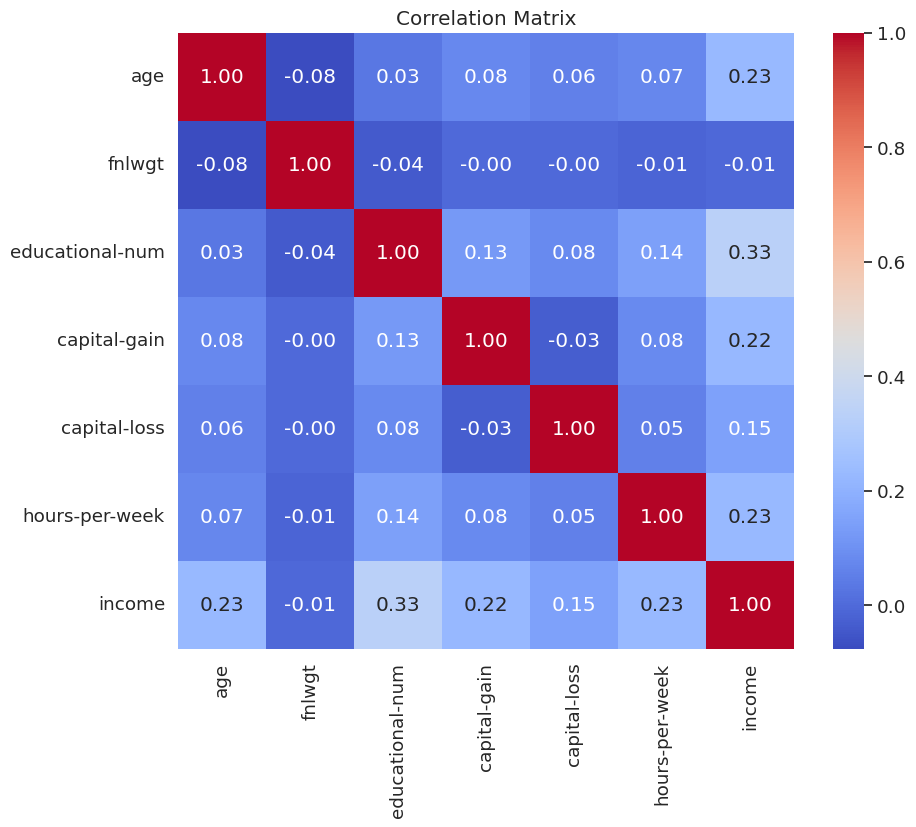

In [101]:
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

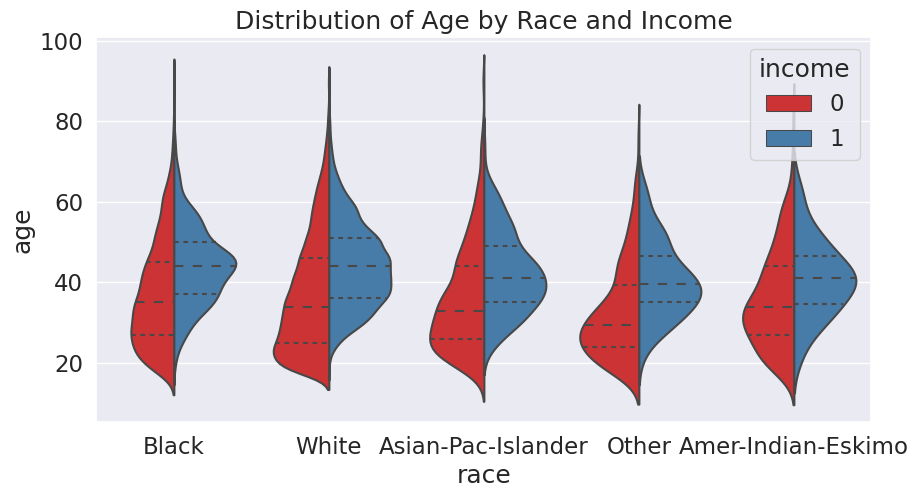

In [120]:
plt.figure(figsize=(10,5))
sns.violinplot(x="race", y="age", hue="income", data=df, split=True, inner="quart", palette="Set1")
plt.title("Distribution of Age by Race and Income")
plt.show()

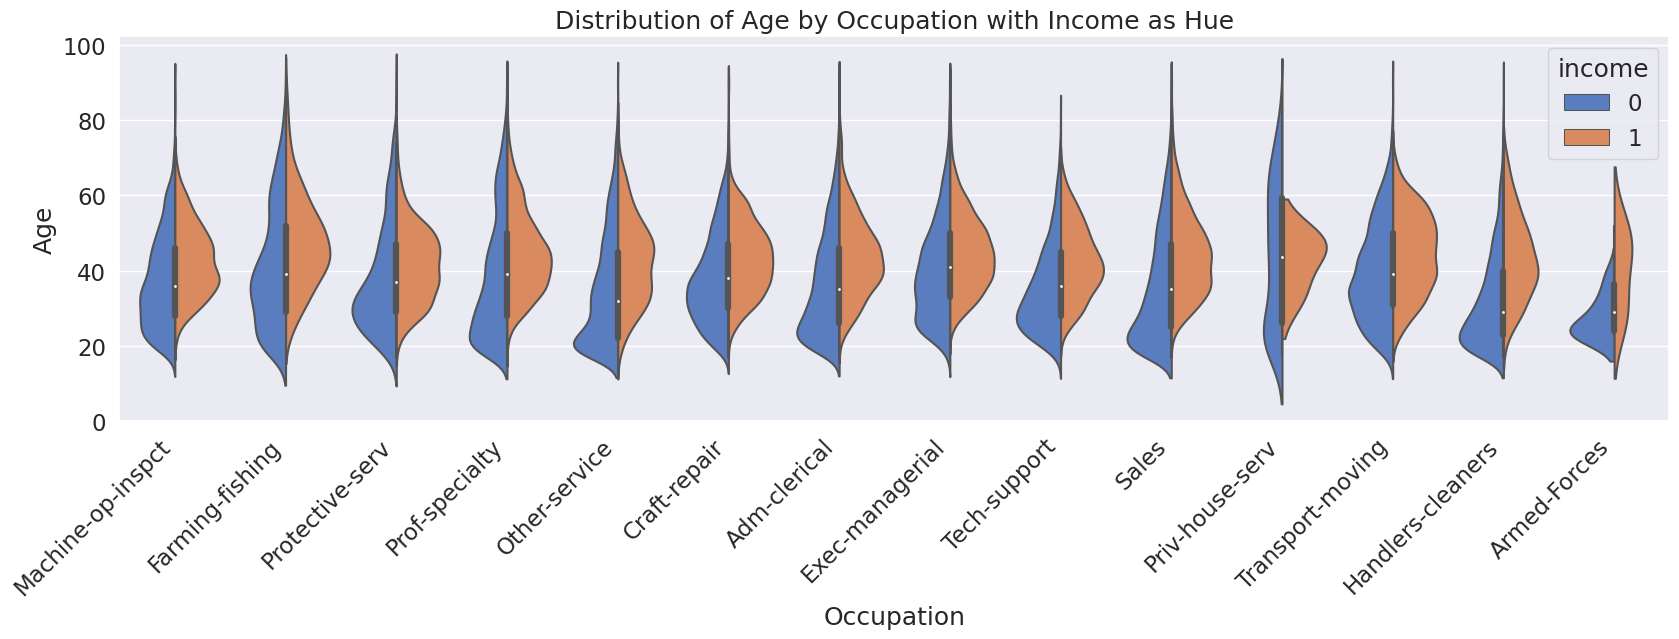

In [118]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Occupation")
ax.set_ylabel("Age")
ax.set_title("Distribution of Age by Occupation with Income as Hue")
plt.show()